In [1]:
import gymnasium as gym
import time
import matplotlib.pyplot as plt
import numpy as np
import random

In [94]:
class Frozen_Lake_Q_Learning():
    def __init__(self):
        self.env = gym.make('FrozenLake-v1')
        self.env.reset()
        self.q_table = self.create_q_table()
        self.learning_rate = 0.8
        self.discount_factor = 0.95
        self.epsilon = 1
        self.episodes = 15000
        self.learned_episodes = 5
        self.max_steps = 99

    #create q_table
    def create_q_table (self):
        q_table = np.zeros([16,4])
        return q_table

    #choose action based on epsilon greedy policy
    def choose_action (self,observations,_):
        if _ < 500:
            return self.env.action_space.sample()
        if random.random() < self.epsilon:
             return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[observations][:])
        
    #progress episodes
    def progress_episodes(self):
        arr = []
        holes = [5,7,11,12]
        for episode in range(self.episodes):
            print("Episode: ",episode+1)
            total_reward = 0
            obs = []
            (observations,_) = self.env.reset()
            for steps in range (self.max_steps):
                action = self.choose_action(observations,episode)
                obs.append(observations)
                (next_observations,reward,terminated,_,_) = self.env.step(action)
                if next_observations in obs:
                    reward -= 1
                    self.q_table[observations][action] = self.q_table[observations][action] + self.learning_rate*(reward + self.discount_factor*np.max(self.q_table[next_observations][:]) - self.q_table[observations][action])
                else:
                    if next_observations == 15:
                        reward += 10
                        self.q_table[observations][action] = self.q_table[observations][action] + self.learning_rate*(reward - self.q_table[observations][action])
                    elif next_observations in holes:
                        reward -= 10
                        self.q_table[observations][action] = self.q_table[observations][action] + self.learning_rate*(reward - self.q_table[observations][action])
                    else:
                        reward += 0
                        self.q_table[observations][action] = self.q_table[observations][action] + self.learning_rate*(reward + self.discount_factor*np.max(self.q_table[next_observations][:]) - self.q_table[observations][action])
                
                total_reward += reward
                observations = next_observations
                
                if terminated:
                    break
                
            self.epsilon = 0.01 + 0.99*np.exp(-0.005*episode)    
            print("Total reward: ",total_reward)
            print("steps: ",steps)
            arr.append(total_reward)
        return arr
    
    #use learned strategy
    def use_learned_strategy (self):
        arr = []
        holes = [5,7,11,12]
        self.env = gym.make('FrozenLake-v1',render_mode = 'human')
        for episode in range(self.learned_episodes):
            print("Episode: ",episode+1)
            total_reward = 0
            (observations,_) = self.env.reset()
            obs = []
            for steps in range (self.max_steps):
                obs.append(observations)
                action = np.argmax(self.q_table[observations][:])
                (next_observations,reward,terminated,_,_) = self.env.step(action)
                if next_observations in obs:
                    reward -= 1
                else:
                    if next_observations == 15:
                        reward += 10
                    elif next_observations in holes:
                        reward -= 10
                    else:
                        reward +=0
                total_reward += reward
                observations = next_observations
                if terminated:
                    break
            print("Total reward: ",total_reward)
            print("steps: ",steps)
            arr.append(total_reward)
        self.env.close()
        return arr
        

In [95]:
Q1 = Frozen_Lake_Q_Learning()
arr = Q1.progress_episodes()

Episode:  1
Total reward:  -13.0
steps:  5
Episode:  2
Total reward:  -14.0
steps:  5
Episode:  3
Total reward:  -11.0
steps:  2
Episode:  4
Total reward:  -15.0
steps:  7
Episode:  5
Total reward:  -12.0
steps:  3
Episode:  6
Total reward:  -13.0
steps:  6
Episode:  7
Total reward:  -15.0
steps:  10
Episode:  8
Total reward:  -12.0
steps:  8
Episode:  9
Total reward:  -10.0
steps:  1
Episode:  10
Total reward:  -12.0
steps:  3
Episode:  11
Total reward:  -13.0
steps:  6
Episode:  12
Total reward:  -12.0
steps:  4
Episode:  13
Total reward:  -13.0
steps:  4
Episode:  14
Total reward:  -11.0
steps:  2
Episode:  15
Total reward:  -11.0
steps:  4
Episode:  16
Total reward:  -10.0
steps:  2
Episode:  17
Total reward:  -15.0
steps:  7
Episode:  18
Total reward:  -15.0
steps:  7
Episode:  19
Total reward:  -10.0
steps:  1
Episode:  20
Total reward:  -11.0
steps:  2
Episode:  21
Total reward:  -14.0
steps:  5
Episode:  22
Total reward:  -11.0
steps:  8
Episode:  23
Total reward:  -25.0
steps:

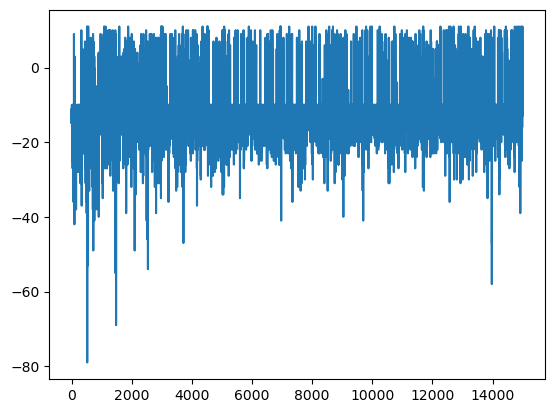

In [96]:
plt.plot(range(Q1.episodes),arr)
plt.show()

In [98]:
learned = Q1.use_learned_strategy()

Episode:  1
Total reward:  -13.0
steps:  4
Episode:  2
Total reward:  -10.0
steps:  1
Episode:  3
Total reward:  -23.0
steps:  17
Episode:  4
Total reward:  4.0
steps:  12
Episode:  5
Total reward:  -12.0
steps:  3


In [100]:
print(Q1.q_table)

[[-12.09931023 -12.02888272  -5.98678347 -12.34396778]
 [-11.6831559   -9.22898065 -11.39872489 -11.9355481 ]
 [-11.35176976 -11.57963061  -8.85784555 -11.63044861]
 [-10.04478205 -11.85484018 -11.58778472 -11.75980229]
 [-11.76486263  -9.21009422 -10.78664238 -11.80677883]
 [  0.           0.           0.           0.        ]
 [-10.0199558    2.32033046 -10.19453016 -10.01149198]
 [  0.           0.           0.           0.        ]
 [-10.01500666 -10.47670221 -10.1804572   -4.89715935]
 [-10.13224223   7.53209118 -10.43607568  -8.07037557]
 [-10.41803179  10.16869997 -10.09821416 -10.22020483]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [-10.02459659  -9.62244865   2.03366563 -10.73716749]
 [ -9.23661161  -6.24992804  -5.99921241  10.98925404]
 [  0.           0.           0.           0.        ]]
